In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import conda
import os

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


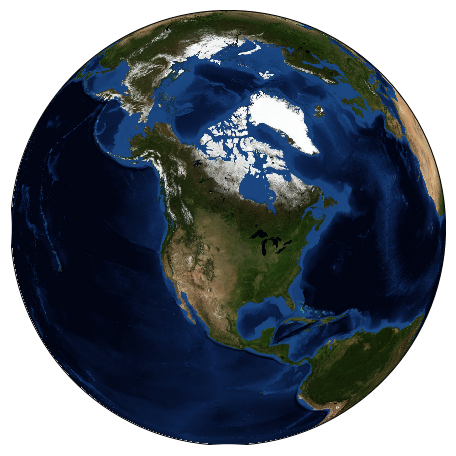

In [5]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


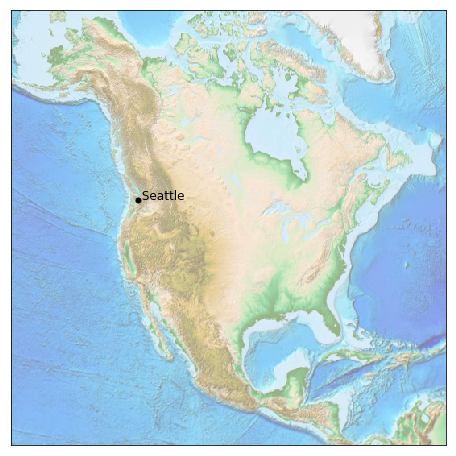

In [7]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

In [8]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

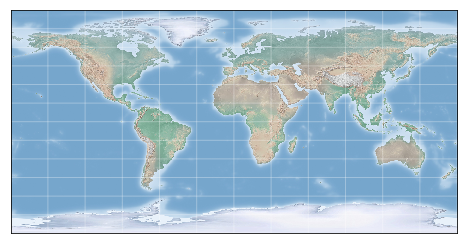

In [9]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

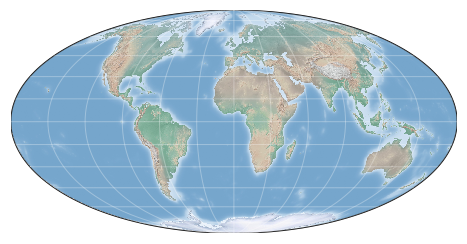

In [10]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

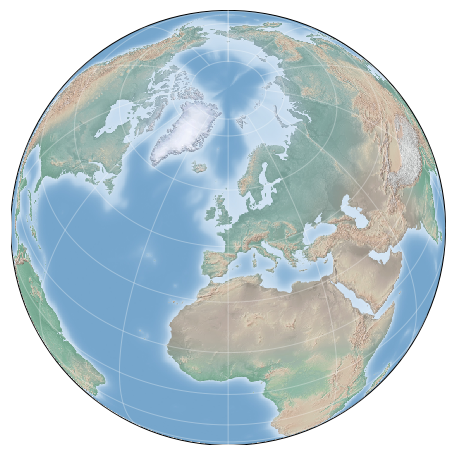

In [11]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

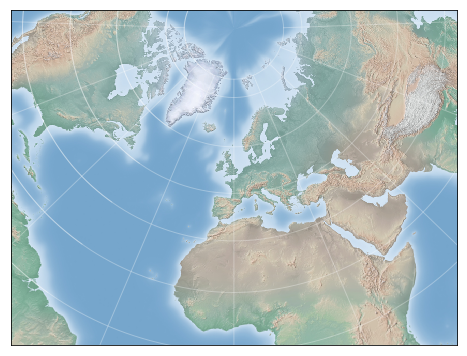

In [12]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

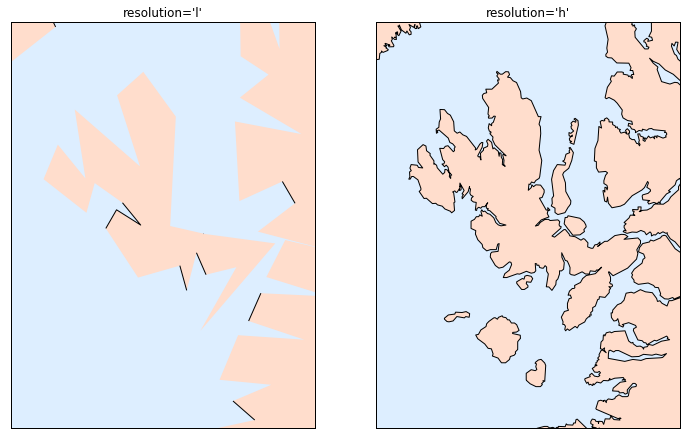

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
                width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));

In [30]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')

# Extract the data we're interested in
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

array([34.57611111, 34.15333333, 37.75611111, 37.88694444, 34.08194444,
       33.575     , 41.48722222, 38.41944444, 38.16805556, 33.83611111,
       40.45222222, 38.06833333, 38.005     , 34.51666667, 34.13277778,
       40.86638889, 35.12083333, 33.86722222, 35.20916667, 35.48416667,
       37.45861111, 37.34777778, 38.89861111, 33.34083333, 36.00416667,
       34.13055556, 35.36666667, 34.08277778, 33.93166667, 34.9       ,
       33.92416667, 33.98333333, 33.88805556, 33.96805556, 37.51805556,
       37.87277778, 38.06333333, 37.87166667, 34.07305556, 34.24138889,
       39.41388889, 37.3635    , 40.88277778, 33.61027778, 34.14944444,
       32.97861111, 33.92333333, 37.93194444, 37.68083333, 34.61416667,
       33.85611111, 34.18027778, 37.58333333, 34.13833333, 32.67888889,
       35.12583333, 33.98805556, 33.12555556, 38.58138889, 34.23333333,
       37.28388889, 33.68416667, 36.97638889, 33.12194444, 36.55527778,
       34.39916667, 33.83972222, 33.80777778, 37.60138889, 33.86

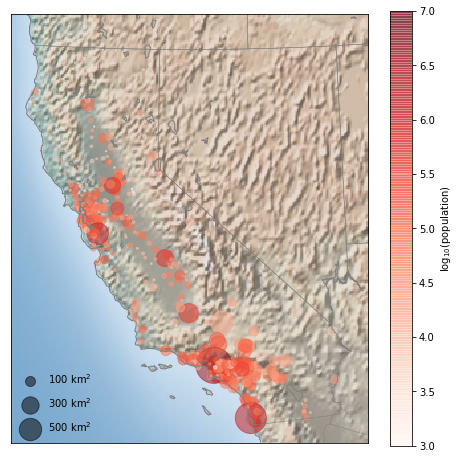

In [17]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

In [18]:
from netCDF4 import Dataset
data = Dataset('gistemp250.nc')

In [19]:
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2014, 1, 15),
                       data.variables['time'])

In [20]:
from actuariat_python.data import elections_presidentielles
dict_df = elections_presidentielles(local=True, agg="dep")

In [21]:
list(dict_df.keys())

['circ1', 'circ2', 'dep1', 'dep2']

In [22]:
dict_df["dep1"].head()

,Code du département,Libellé du département,Code de la circonscription,Inscrits,Votants,Exprimés,Blancs et nuls,Nathalie ARTHAUD (LO),Philippe POUTOU (NPA),Jean-Luc MELENCHON (FG),François HOLLANDE (PS),Eva JOLY (EELV),François BAYROU (MODEM),Nicolas SARKOZY (UMP),Nicolas DUPONT-AIGNAN (DLR),Marine LE PEN (FN),Jacques CHEMINADE (SP)
0,1,AIN,15,393808,327812,321359,6453,1794,3323,30898,73096,7268,32650,97722,7208,66540,860
1,2,AISNE,15,376068,303140,297944,5196,2490,3860,30360,80751,3455,19895,72090,5853,78452,738
2,3,ALLIER,6,256275,211009,205950,5059,1482,2584,27969,61131,3232,17814,49477,4068,37736,457
3,4,ALPES-DE-HAUTE-PROVENCE,3,123933,102899,100788,2111,487,1394,15269,24551,2933,7483,25668,1845,20875,283
4,5,HAUTES-ALPES,3,106865,88619,86777,1842,488,1152,12175,21248,3147,8559,22655,1782,15359,212


In [23]:
def cleandep(s):
    if isinstance(s, str):
         r = s.lstrip('0')
    else:
        r = str(s)
    return r
dict_df["dep1"]["Code du département"] = dict_df["dep1"]["Code du département"].apply(cleandep)
dict_df["dep2"]["Code du département"] = dict_df["dep2"]["Code du département"].apply(cleandep)

In [24]:
deps = dict_df["dep1"].merge(dict_df["dep2"],
                                       on="Code du département",
                                       suffixes=("T1", "T2"))
deps.columns

Index(['Code du département', 'Libellé du départementT1',
       'Code de la circonscriptionT1', 'InscritsT1', 'VotantsT1', 'ExprimésT1',
       'Blancs et nulsT1', 'Nathalie ARTHAUD (LO)', 'Philippe POUTOU (NPA)',
       'Jean-Luc MELENCHON (FG)', 'François HOLLANDE (PS)T1',
       'Eva JOLY (EELV)', 'François BAYROU (MODEM)', 'Nicolas SARKOZY (UMP)T1',
       'Nicolas DUPONT-AIGNAN (DLR)', 'Marine LE PEN (FN)',
       'Jacques CHEMINADE (SP)', 'Libellé du départementT2',
       'Code de la circonscriptionT2', 'InscritsT2', 'VotantsT2', 'ExprimésT2',
       'Blancs et nulsT2', 'François HOLLANDE (PS)T2',
       'Nicolas SARKOZY (UMP)T2'],
      dtype='object')

In [25]:
deps["rHollandeT1"] = deps['François HOLLANDE (PS)T1'] / (deps["VotantsT1"] - deps["Blancs et nulsT1"])
deps["rSarkozyT1"] = deps['Nicolas SARKOZY (UMP)T1'] / (deps["VotantsT1"] - deps["Blancs et nulsT1"])
deps["rNulT1"] = deps["Blancs et nulsT1"] / deps["VotantsT1"]
deps["rHollandeT2"] = deps["François HOLLANDE (PS)T2"] / (deps["VotantsT2"] - deps["Blancs et nulsT2"])
deps["rSarkozyT2"] = deps['Nicolas SARKOZY (UMP)T2'] / (deps["VotantsT2"] - deps["Blancs et nulsT2"])
deps["rNulT2"] = deps["Blancs et nulsT2"] / deps["VotantsT2"]
data = deps[["Code du département", "Libellé du départementT1",
             "VotantsT1", "rHollandeT1", "rSarkozyT1", "rNulT1",
             "VotantsT2", "rHollandeT2", "rSarkozyT2", "rNulT2"]]
data_elections = data # parfois data est remplacé dans la suite
data.head()

,Code du département,Libellé du départementT1,VotantsT1,rHollandeT1,rSarkozyT1,rNulT1,VotantsT2,rHollandeT2,rSarkozyT2,rNulT2
0,1,AIN,327812,0.227459,0.304090,0.019685,326587,0.427692,0.572308,0.059748
1,2,AISNE,303140,0.271027,0.241958,0.017141,302076,0.524020,0.475980,0.069704
2,3,ALLIER,211009,0.296824,0.240238,0.023975,211132,0.568861,0.431139,0.070686
3,4,ALPES-DE-HAUTE-PROVENCE,102899,0.243591,0.254673,0.020515,103581,0.510594,0.489406,0.064095
4,5,HAUTES-ALPES,88619,0.244858,0.261071,0.020786,89405,0.508935,0.491065,0.067390


In [28]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-5, 10, 42, 52])

ax.add_feature(cfeature.OCEAN.with_scale('50m'))
# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.RIVERS)  # pas d'effet, cartopy ne connaît pas les rivières en France
# ax.add_feature(cfeature.BORDERS, linestyle=':')
# cette instruction télécharge un fichier (10m=14Mo, 50m, 110m)
# il faut la résolution 10m pour la France
ax.add_feature(cfeature.STATES.with_scale('10m'))
ax.set_title('France');

ModuleNotFoundError: No module named 'cartopy'